# LSTM

## Preparación de ambiente

### Carga de módulos

In [ ]:
# Data Wrangling
import numpy as np
import pandas as pd

# Data visualization
import cufflinks as cf

# Modeling
from keras import metrics
from keras.layers import LSTM
from keras.layers import Dense
from keras.models import Sequential
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Environment setup
cf.go_offline()
pd.set_option('display.float_format', lambda x: '%.5f' % x)

2023-06-29 19:53:01.037682: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-29 19:53:01.174906: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-29 19:53:01.609606: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Data Wrangling

### Lectura de datos

In [ ]:
df = pd.read_csv("./AirPassengers.csv")

In [ ]:
df

,Month,#Passengers
0,1949-01-01,112.00000
1,1949-02-01,118.00000
2,1949-03-01,132.00000
3,1949-04-01,129.00000
4,1949-05-01,121.00000
...,...,...
137,1960-06-01,535.00000
138,1960-07-01,622.00000
139,1960-08-01,606.00000
140,1960-09-01,508.00000


### EDA

In [ ]:
df.head()

,Month,#Passengers
0,1949-01-01,112.00000
1,1949-02-01,118.00000
2,1949-03-01,132.00000
3,1949-04-01,129.00000
4,1949-05-01,121.00000


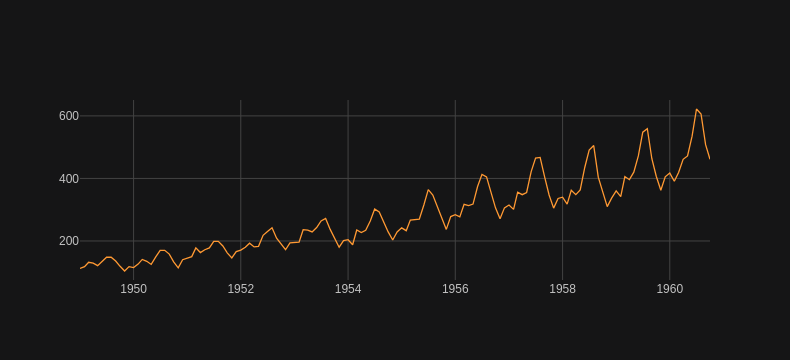

In [ ]:
df.set_index("Month").iplot()

### Preprocesamiento

#### Tipado de datos

In [ ]:
df["Month"] = pd.to_datetime(df["Month"])
df["#Passengers"] = df["#Passengers"].astype(float)

#### Creación de la target

In [ ]:
df["y"] = df["#Passengers"].shift(-1)

In [ ]:
df

,Month,#Passengers,y
0,1949-01-01,112.00000,118.00000
1,1949-02-01,118.00000,132.00000
2,1949-03-01,132.00000,129.00000
3,1949-04-01,129.00000,121.00000
4,1949-05-01,121.00000,135.00000
...,...,...,...
137,1960-06-01,535.00000,622.00000
138,1960-07-01,622.00000,606.00000
139,1960-08-01,606.00000,508.00000
140,1960-09-01,508.00000,461.00000


In [ ]:
df["Month"].diff()

0         NaT
1     31 days
2     28 days
3     31 days
4     30 days
        ...  
136   30 days
137   31 days
138   30 days
139   31 days
140   31 days
Name: Month, Length: 141, dtype: timedelta64[ns]

In [ ]:
df["Month"].diff().mean()

Timedelta('30 days 10:22:58.723404255')

In [ ]:
df.dropna(inplace=True)

### Train-test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[["#Passengers"]].to_numpy(), df[["y"]].to_numpy(), shuffle=False)

In [ ]:
X_test

array([[347.],
       [305.],
       [336.],
       [340.],
       [318.],
       [362.],
       [348.],
       [363.],
       [435.],
       [491.],
       [505.],
       [404.],
       [359.],
       [310.],
       [337.],
       [360.],
       [342.],
       [406.],
       [396.],
       [420.],
       [472.],
       [548.],
       [559.],
       [463.],
       [407.],
       [362.],
       [405.],
       [417.],
       [391.],
       [419.],
       [461.],
       [472.],
       [535.],
       [622.],
       [606.],
       [508.]])

In [ ]:
X_train.shape

(105, 1)

In [ ]:
X_test.shape

(36, 1)

### Escalamiento de datos

In [ ]:
sc = MinMaxScaler()

In [ ]:
sc.fit(X_train)

MinMaxScaler()

In [ ]:
X_train, X_test, y_train, y_test = [sc.transform(x) for x in [X_train, X_test, y_train, y_test]]

In [ ]:
X_train.shape

(105, 1)

In [ ]:
X_train.max()

1.0

In [ ]:
X_test.max()

1.4269972451790633

### Preparación de sets

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
X_train.shape

(105, 1, 1)

## Modelado

### Base de modelo

In [ ]:
model = Sequential()

### Long-short term memory

In [ ]:
LSTM?

Init signature:
LSTM(
    units,
    activation='tanh',
    recurrent_activation='sigmoid',
    use_bias=True,
    kernel_initializer='glorot_uniform',
    recurrent_initializer='orthogonal',
    bias_initializer='zeros',
    unit_forget_bias=True,
    kernel_regularizer=None,
    recurrent_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    time_major=False,
    unroll=False,
    **kwargs,
)
Docstring:     
Long Short-Term Memory layer - Hochreiter 1997.

See [the Keras RNN API guide](https://www.tensorflow.org/guide/keras/rnn)
for details about the usage of RNN API.

Based on available runtime hardware and constraints, this layer
will choose different implementations (cuDNN-based or pure-TensorFlow)
to maximize the performance. If a GP

In [ ]:
model.add(LSTM(10, input_shape=(1, 1), activation="tanh"))

2023-06-29 20:26:55.172569: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-29 20:26:55.173238: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-29 20:26:55.173669: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

### Capa de salida

In [ ]:
model.add(Dense(1))

### Configuración del modelo

#### Métricas de ajuste

In [ ]:
kmetrics = [
    metrics.RootMeanSquaredError(name='rms'),
    metrics.MeanAbsoluteError(name='mae')
]

#### Callbacks

In [ ]:
early_stopping = EarlyStopping(monitor='val_mae', patience=20)

In [ ]:
checkpoint = ModelCheckpoint('models/lstm/model_{val_mae:.3f}.h5',
                             save_best_only=True,
                             save_weights_only=False,
                             monitor='val_mae')

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=kmetrics)

### Entrenamiento

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=1, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stopping])

Epoch 1/100


2023-06-29 20:28:12.323430: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-29 20:28:12.323957: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-29 20:28:12.324797: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

 60/105 [================>.............] - ETA: 0s - loss: 0.1290 - rms: 0.3591 - mae: 0.2818  

2023-06-29 20:28:14.058844: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-06-29 20:28:14.122790: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


105/105 [==============================] - 2s 3ms/step - loss: 0.1156 - rms: 0.3400 - mae: 0.2649 - val_loss: 0.4557 - val_rms: 0.6750 - val_mae: 0.6435
Epoch 2/100
 60/105 [================>.............] - ETA: 0s - loss: 0.0693 - rms: 0.2633 - mae: 0.1895

2023-06-29 20:28:14.368775: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-29 20:28:14.369547: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-29 20:28:14.369999: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

105/105 [==============================] - 0s 1ms/step - loss: 0.0522 - rms: 0.2285 - mae: 0.1708 - val_loss: 0.2577 - val_rms: 0.5077 - val_mae: 0.4717
Epoch 3/100
105/105 [==============================] - 0s 994us/step - loss: 0.0329 - rms: 0.1814 - mae: 0.1436 - val_loss: 0.1702 - val_rms: 0.4126 - val_mae: 0.3737
Epoch 4/100
105/105 [==============================] - 0s 1ms/step - loss: 0.0278 - rms: 0.1669 - mae: 0.1376 - val_loss: 0.1463 - val_rms: 0.3826 - val_mae: 0.3445
Epoch 5/100
105/105 [==============================] - 0s 1ms/step - loss: 0.0241 - rms: 0.1553 - mae: 0.1273 - val_loss: 0.1101 - val_rms: 0.3319 - val_mae: 0.2926
Epoch 6/100
105/105 [==============================] - 0s 1ms/step - loss: 0.0204 - rms: 0.1429 - mae: 0.1183 - val_loss: 0.0878 - val_rms: 0.2963 - val_mae: 0.2567
Epoch 7/100
105/105 [==============================] - 0s 1ms/step - loss: 0.0169 - rms: 0.1301 - mae: 0.1062 - val_loss: 0.0711 - val_rms: 0.2667 - val_mae: 0.2262
Epoch 8/100
105/105 

### Análisis de resultados

In [ ]:
results = pd.DataFrame(history.history)

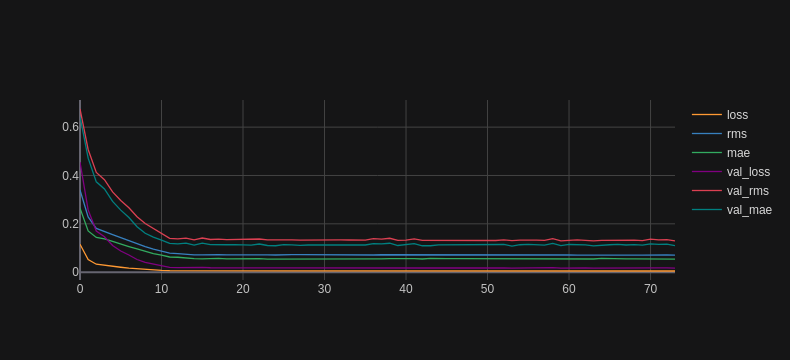

In [ ]:
results.iplot()

### Predicción

In [ ]:
df["y_hat"] = sc.inverse_transform(model.predict(sc.transform(df[["#Passengers"]].to_numpy()).reshape(df.shape[0], 1, 1))).round(0)

5/5 [==============================] - 0s 1ms/step


2023-06-29 20:30:46.477543: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-29 20:30:46.478049: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-29 20:30:46.478901: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

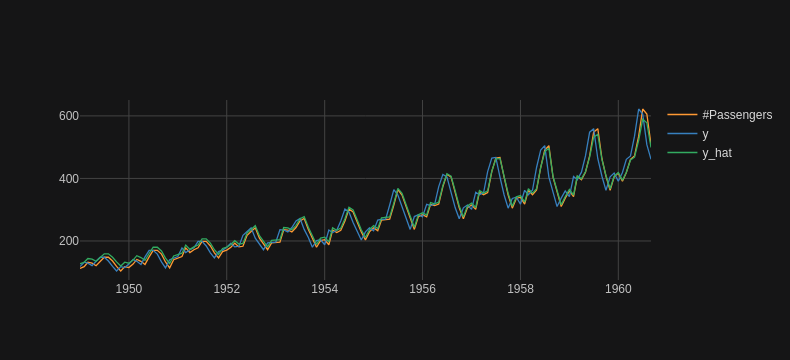

In [ ]:
df.set_index("Month").iplot()

## Plan B

### Tendencia

In [ ]:
linreg = LinearRegression()

In [ ]:
df["t"] = df.index

In [ ]:
linreg.fit(df[["t"]], df[["#Passengers"]])

LinearRegression()

In [ ]:
linreg.coef_

array([[2.69428486]])

In [ ]:
df["trend"] = linreg.predict(df[["t"]])

In [ ]:
df

,Month,#Passengers,y,y_hat,t,trend
0,1949-01-01,112.00000,118.00000,127.00000,0,88.56318
1,1949-02-01,118.00000,132.00000,132.00000,1,91.25747
2,1949-03-01,132.00000,129.00000,144.00000,2,93.95175
3,1949-04-01,129.00000,121.00000,142.00000,3,96.64604
4,1949-05-01,121.00000,135.00000,135.00000,4,99.34032
...,...,...,...,...,...,...
136,1960-05-01,472.00000,535.00000,468.00000,136,454.98592
137,1960-06-01,535.00000,622.00000,522.00000,137,457.68021
138,1960-07-01,622.00000,606.00000,589.00000,138,460.37449
139,1960-08-01,606.00000,508.00000,578.00000,139,463.06878


In [ ]:
df["pass_notrend"] = df["#Passengers"] - df["trend"]

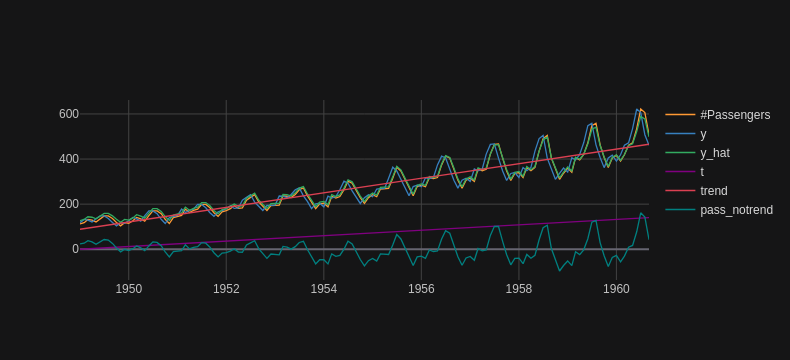

In [ ]:
df.set_index("Month").iplot()

In [ ]:
df.describe()

,Month,#Passengers,y,y_hat,t,trend,pass_notrend
count,141,141.00000,141.00000,141.00000,141.00000,141.00000,141.00000
mean,1954-10-31 12:56:10.212765952,277.16312,279.63830,282.80850,70.00000,277.16312,0.00000
min,1949-01-01 00:00:00,104.00000,104.00000,120.00000,0.00000,88.56318,-96.48879
25%,1951-12-01 00:00:00,180.00000,180.00000,189.00000,35.00000,182.86315,-31.13742
50%,1954-11-01 00:00:00,264.00000,264.00000,271.00000,70.00000,277.16312,-5.89460
75%,1957-10-01 00:00:00,356.00000,359.00000,361.00000,105.00000,371.46309,25.88254
max,1960-09-01 00:00:00,622.00000,622.00000,589.00000,140.00000,465.76306,161.62551
std,NaN,119.19244,119.36171,113.00391,40.84728,110.05420,45.77020


### Preparación de sets

In [ ]:
df["y_trendless"] = df["pass_notrend"].shift(-1)

In [ ]:
df

,Month,#Passengers,y,y_hat,t,trend,pass_notrend,y_trendless
0,1949-01-01,112.00000,118.00000,127.00000,0,88.56318,23.43682,26.74253
1,1949-02-01,118.00000,132.00000,132.00000,1,91.25747,26.74253,38.04825
2,1949-03-01,132.00000,129.00000,144.00000,2,93.95175,38.04825,32.35396
3,1949-04-01,129.00000,121.00000,142.00000,3,96.64604,32.35396,21.65968
4,1949-05-01,121.00000,135.00000,135.00000,4,99.34032,21.65968,32.96540
...,...,...,...,...,...,...,...,...
136,1960-05-01,472.00000,535.00000,468.00000,136,454.98592,17.01408,77.31979
137,1960-06-01,535.00000,622.00000,522.00000,137,457.68021,77.31979,161.62551
138,1960-07-01,622.00000,606.00000,589.00000,138,460.37449,161.62551,142.93122
139,1960-08-01,606.00000,508.00000,578.00000,139,463.06878,142.93122,42.23694


In [ ]:
df.dropna(inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[["pass_notrend"]].to_numpy(), df[["y_trendless"]].to_numpy(), shuffle=False)

In [ ]:
sc = MinMaxScaler()

In [ ]:
sc.fit(X_train)

MinMaxScaler()

In [ ]:
X_train, X_test, y_train, y_test = [sc.transform(x) for x in [X_train, X_test, y_train, y_test]]

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

### Entrenamiento

In [ ]:
model = Sequential()
model.add(LSTM(10, input_shape=(1, 1), activation="tanh"))
model.add(Dense(10, activation="sigmoid"))
model.add(Dense(1))

2023-06-29 20:35:31.291333: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-29 20:35:31.291958: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-29 20:35:31.292328: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=kmetrics)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=1, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stopping])

Epoch 1/100


2023-06-29 20:35:32.946551: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-29 20:35:32.947233: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-29 20:35:32.947673: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

105/105 [==============================] - 1s 2ms/step - loss: 1.3518 - rms: 1.0055 - mae: 0.8665 - val_loss: 0.8118 - val_rms: 0.9010 - val_mae: 0.8171
Epoch 2/100
 56/105 [===============>..............] - ETA: 0s - loss: 0.4740 - rms: 0.6884 - mae: 0.6536

2023-06-29 20:35:33.693123: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-29 20:35:33.693814: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-29 20:35:33.694237: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

105/105 [==============================] - 0s 1ms/step - loss: 0.3397 - rms: 0.5828 - mae: 0.5309 - val_loss: 0.2257 - val_rms: 0.4751 - val_mae: 0.3468
Epoch 3/100
105/105 [==============================] - 0s 1ms/step - loss: 0.0578 - rms: 0.2403 - mae: 0.1886 - val_loss: 0.1185 - val_rms: 0.3442 - val_mae: 0.2658
Epoch 4/100
105/105 [==============================] - 0s 1ms/step - loss: 0.0299 - rms: 0.1729 - mae: 0.1314 - val_loss: 0.1110 - val_rms: 0.3331 - val_mae: 0.2671
Epoch 5/100
105/105 [==============================] - 0s 1ms/step - loss: 0.0290 - rms: 0.1703 - mae: 0.1336 - val_loss: 0.1087 - val_rms: 0.3297 - val_mae: 0.2632
Epoch 6/100
105/105 [==============================] - 0s 1ms/step - loss: 0.0285 - rms: 0.1688 - mae: 0.1303 - val_loss: 0.1057 - val_rms: 0.3251 - val_mae: 0.2601
Epoch 7/100
105/105 [==============================] - 0s 1ms/step - loss: 0.0279 - rms: 0.1669 - mae: 0.1301 - val_loss: 0.1036 - val_rms: 0.3218 - val_mae: 0.2558
Epoch 8/100
105/105 [=

### Análisis de resultados

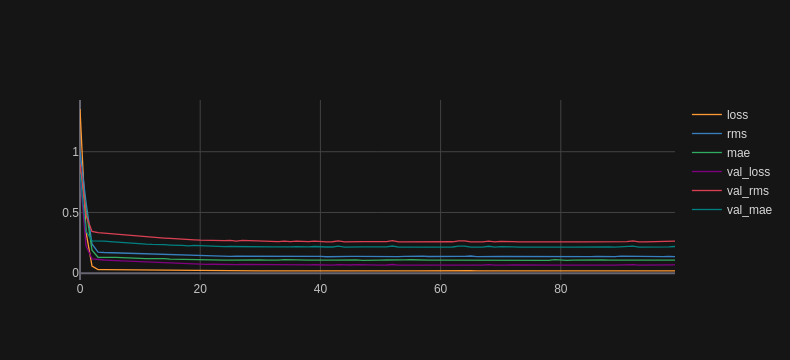

In [ ]:
results = pd.DataFrame(history.history)
results.iplot()

In [ ]:
df["y_hat_notrend"] = sc.inverse_transform(model.predict(sc.transform(df[["pass_notrend"]].to_numpy()).reshape(df.shape[0], 1, 1))).round(0)

5/5 [==============================] - 0s 620us/step


2023-06-29 20:36:05.037843: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-29 20:36:05.038448: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-29 20:36:05.039102: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [ ]:
df

,Month,#Passengers,y,y_hat,t,trend,pass_notrend,y_trendless,y_hat_notrend
0,1949-01-01,112.00000,118.00000,127.00000,0,88.56318,23.43682,26.74253,12.00000
1,1949-02-01,118.00000,132.00000,132.00000,1,91.25747,26.74253,38.04825,15.00000
2,1949-03-01,132.00000,129.00000,144.00000,2,93.95175,38.04825,32.35396,23.00000
3,1949-04-01,129.00000,121.00000,142.00000,3,96.64604,32.35396,21.65968,19.00000
4,1949-05-01,121.00000,135.00000,135.00000,4,99.34032,21.65968,32.96540,11.00000
...,...,...,...,...,...,...,...,...,...
135,1960-04-01,461.00000,472.00000,459.00000,135,452.29164,8.70836,17.01408,1.00000
136,1960-05-01,472.00000,535.00000,468.00000,136,454.98592,17.01408,77.31979,8.00000
137,1960-06-01,535.00000,622.00000,522.00000,137,457.68021,77.31979,161.62551,49.00000
138,1960-07-01,622.00000,606.00000,589.00000,138,460.37449,161.62551,142.93122,92.00000


In [ ]:
df["y_hat_notrend"] += df["trend"]

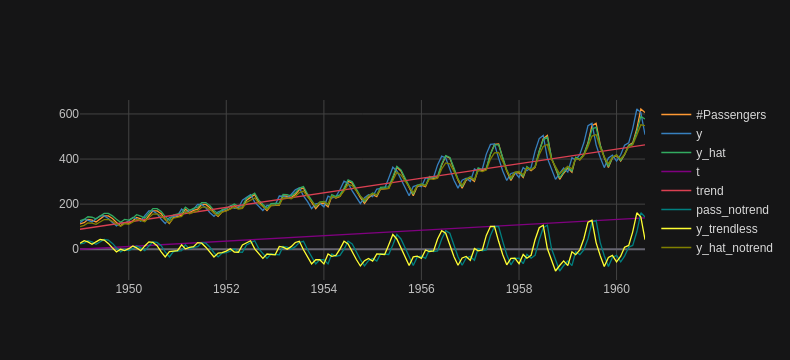

In [ ]:
df.set_index("Month").iplot()

### Comparativa de resultados

#### Con tendencia

In [ ]:
mean_absolute_error(y_pred=df["y_hat"], y_true=df["y"])

25.292857142857144

In [ ]:
mean_absolute_percentage_error(y_pred=df["y_hat"], y_true=df["y"])

0.09238562582465748

In [ ]:
"{:,.5%}".format(mean_absolute_percentage_error(y_pred=df["y_hat"], y_true=df["y"]))

'9.23856%'

#### Sin tendencia

In [ ]:
mean_absolute_error(y_pred=df["y_hat_notrend"], y_true=df["y"])

24.48089263035151

In [ ]:
"{:,.5%}".format(mean_absolute_percentage_error(y_pred=df["y_hat_notrend"], y_true=df["y"]))

'8.65845%'